<h1><center>Carbondioxide Emission Prediction for new light-duty vehicles in Canada</center></h1>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

In [4]:
# Dowloading the data from IBM Cloud
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-08-25 09:27:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... failed: Unknown error.
Retrying.

--2022-08-25 09:27:35--  (try: 2)  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'FuelConsumption.csv'

 

In [7]:
# Reading the data

data = pd.read_csv('FuelConsumption.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,Unnamed: 13
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,NaN
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,NaN
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,NaN
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,NaN
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,NaN


In [8]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,Unnamed: 13
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,0.0
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679,NaN
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304,NaN
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000,NaN
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000,NaN
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000,NaN
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000,NaN
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000,NaN


In [10]:
# Taking some of the features 
d1 = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
d1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


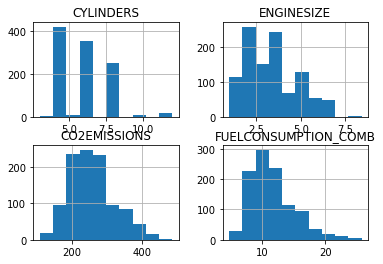

In [11]:
# Plotting these features
viz = d1[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

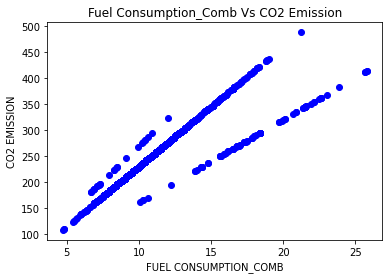

In [15]:
# Plotting each of these features with respect to the CO2 Emission
# To see their linear relationship

plt.scatter(d1.FUELCONSUMPTION_COMB, d1.CO2EMISSIONS, color = 'b')
plt.xlabel('FUEL CONSUMPTION_COMB')
plt.ylabel('CO2 EMISSION')
plt.title('Fuel Consumption_Comb Vs CO2 Emission')
plt.show()

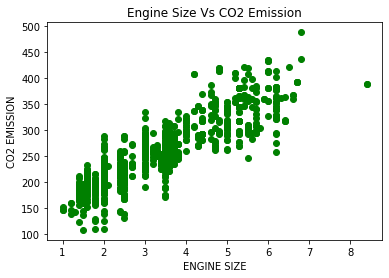

In [20]:
plt.scatter(d1.ENGINESIZE, d1.CO2EMISSIONS, color = 'g')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSION')
plt.title('Engine Size Vs CO2 Emission')
plt.show()

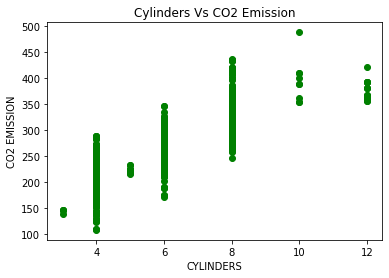

In [22]:
plt.scatter(d1.CYLINDERS, d1.CO2EMISSIONS, color = 'g')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2 EMISSION')
plt.title('Cylinders Vs CO2 Emission')
plt.show()

In [31]:
# Split the data set into test and train set
# 20% - Test set
# 80% - Train set

num = np.random.rand(len(data)) < 0.8
train_set = d1[num]
test_set = d1[~num]

### MODEL 1

In [32]:
# Simple Regression Model - 1
# Predicting CO2 Emissions with respect to Engine Size

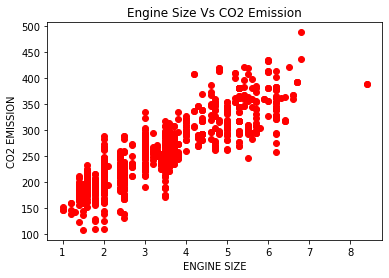

In [34]:
# Train Data Distribution
plt.scatter(d1.ENGINESIZE, d1.CO2EMISSIONS, color = 'r')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSION')
plt.title('Engine Size Vs CO2 Emission')
plt.show()

In [35]:
# Modelling

In [38]:
from sklearn import linear_model as lm

reg = lm.LinearRegression()
train_x = np.asanyarray(train_set[['ENGINESIZE']])
train_y = np.asanyarray(train_set[['CO2EMISSIONS']])
reg.fit(train_x,train_y)

# Getting the co-efficients of the best fit line as a result of training the model
print('Slope or Gradient:',reg.coef_) # Slope of the best fit line
print('Intercept:',reg.intercept_) # Intercept of the best fit line

Slope or Gradient: [[38.34973539]]
Intercept: [127.54729629]


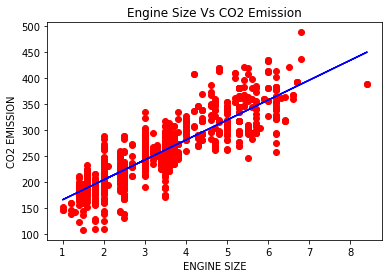

In [40]:
# Plotting the best fit line over the data
plt.scatter(d1.ENGINESIZE, d1.CO2EMISSIONS, color = 'r')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-b')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSION')
plt.title('Engine Size Vs CO2 Emission')
plt.show()

In [41]:
# Evaluation

In [47]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test_set[['ENGINESIZE']])
test_y = np.asanyarray(test_set[['CO2EMISSIONS']])
test_y_ = reg.predict(test_x)

print('Mean Absolute Error:',np.mean(np.absolute(test_y_ - test_y)))
print('Mean Sqaured Error:',np.mean((test_y_ - test_y)**2))
print('R2-Score:',r2_score(test_y, test_y_))

Mean Absolute Error: 22.819010826641282
Mean Sqaured Error: 879.743579104719
R2-Score: 0.8026825759674945


### MODEL 2

In [49]:
# Simple Regression Model - 2
# Predicting CO2 Emissions with respect to Fuel Consumption_Comb

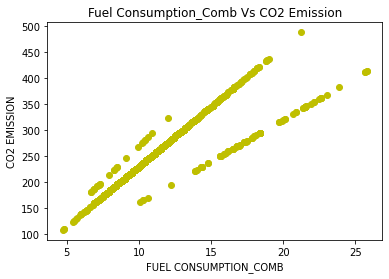

In [51]:
# Visualizing the linear relationship of the data

plt.scatter(d1.FUELCONSUMPTION_COMB, d1.CO2EMISSIONS, color = 'y')
plt.xlabel('FUEL CONSUMPTION_COMB')
plt.ylabel('CO2 EMISSION')
plt.title('Fuel Consumption_Comb Vs CO2 Emission')
plt.show()

In [52]:
# Modelling

In [53]:
from sklearn import linear_model as lm

reg = lm.LinearRegression()
train_x = np.asanyarray(train_set[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train_set[['CO2EMISSIONS']])
reg.fit(train_x,train_y)

# Getting the co-efficients of the best fit line as a result of training the model
print('Slope or Gradient:',reg.coef_) # Slope of the best fit line
print('Intercept:',reg.intercept_) # Intercept of the best fit line

Slope or Gradient: [[15.94464382]]
Intercept: [71.11142643]


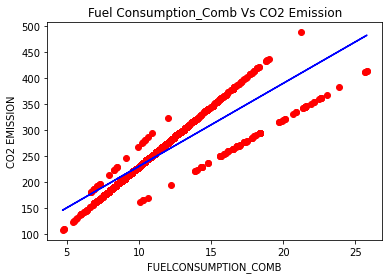

In [59]:
# Plotting the best fit line over the data
plt.scatter(d1.FUELCONSUMPTION_COMB, d1.CO2EMISSIONS, color = 'r')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-b')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2 EMISSION')
plt.title('Fuel Consumption_Comb Vs CO2 Emission')
plt.show()

In [60]:
# Evaluation

In [61]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test_set[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test_set[['CO2EMISSIONS']])
test_y_ = reg.predict(test_x)

print('Mean Absolute Error:',np.mean(np.absolute(test_y_ - test_y)))
print('Mean Sqaured Error:',np.mean((test_y_ - test_y)**2))
print('R2-Score:',r2_score(test_y, test_y_))

Mean Absolute Error: 20.280977864067964
Mean Sqaured Error: 748.2038820298364
R2-Score: 0.8321855752519511
